In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [248]:
f = pd.read_csv('train.csv')

# Cleaning data

### Deleting Null + passengerID and Ticket as it doesn't add any value

In [249]:
f.drop(columns=['PassengerId'], inplace = True)
f.drop(columns=['Ticket'], inplace = True)

In [250]:
f.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Fare          134
Cabin       67866
Embarked      250
dtype: int64

In [251]:
f.dropna(subset=['Age','Fare', 'Embarked'], inplace=True)

In [252]:
f.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin       65371
Embarked        0
dtype: int64

### Find out  if dropping Cabins will affect the dataset

In [253]:
f.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
2,0,3,"Owens, Kenneth",male,0.33,1,2,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,9.77,NaN,S


In [254]:
f_noNullCabin = f.dropna(subset=['Cabin'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

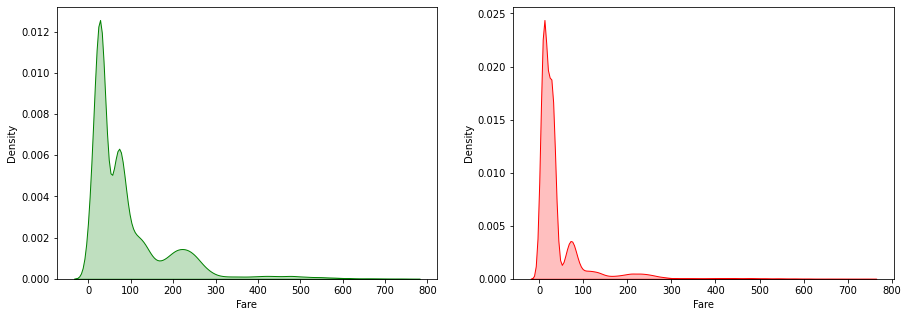

In [255]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


sns.kdeplot(x = f_noNullCabin['Fare'], fill = True, color = 'green', ax = ax0)
sns.kdeplot(x=f['Fare'], fill = True, color = 'red', ax = ax1)

### As data changes significantly. Nan Cabins should be left untouched.

# Checking for outliers and mistakes

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

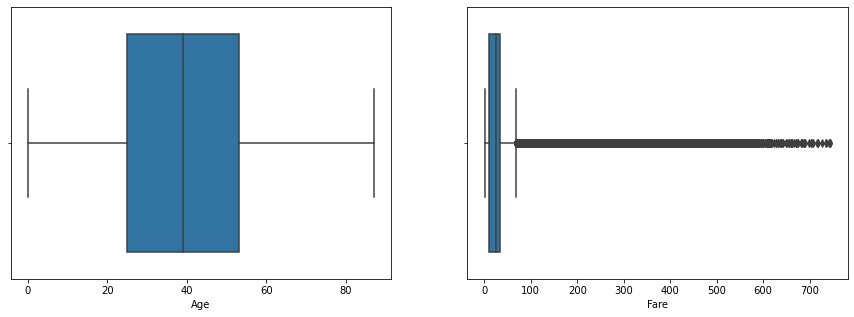

In [256]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(f['Age'], ax=ax0)
sns.boxplot(f['Fare'], ax = ax1)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Count'>

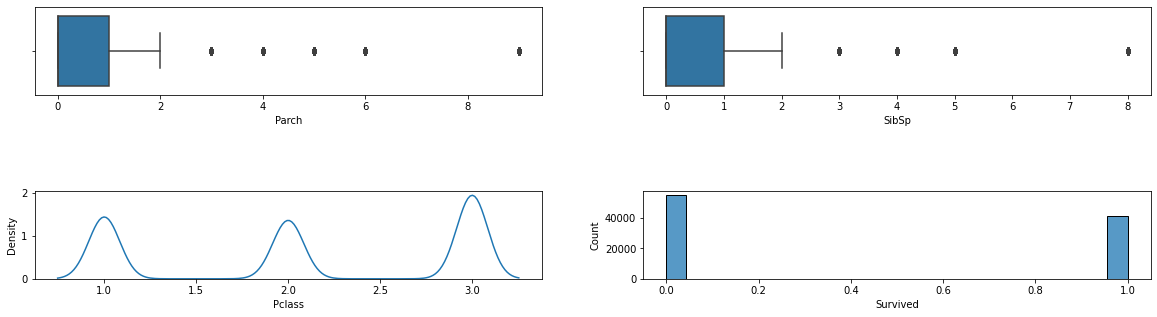

In [257]:
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(2,2, hspace = 1.1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

sns.boxplot(f['Parch'], ax=ax0)
sns.boxplot(f['SibSp'], ax = ax1)
sns.kdeplot(f['Pclass'], ax=ax2)
sns.histplot(f['Survived'], ax = ax3)

I consider Porch and SibSp greater than 6 as outliers and drop it

In [258]:
f_parch_many = f[f['Parch']>6]
f_parch_many.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 1436 to 99175
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  258 non-null    int64  
 1   Pclass    258 non-null    int64  
 2   Name      258 non-null    object 
 3   Sex       258 non-null    object 
 4   Age       258 non-null    float64
 5   SibSp     258 non-null    int64  
 6   Parch     258 non-null    int64  
 7   Fare      258 non-null    float64
 8   Cabin     104 non-null    object 
 9   Embarked  258 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 22.2+ KB


In [259]:
f.drop(f[f['Parch']>6].index, inplace = True)

In [260]:
f_SibSp_many = f[f['SibSp']>6]
f_SibSp_many.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 204 to 99798
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  290 non-null    int64  
 1   Pclass    290 non-null    int64  
 2   Name      290 non-null    object 
 3   Sex       290 non-null    object 
 4   Age       290 non-null    float64
 5   SibSp     290 non-null    int64  
 6   Parch     290 non-null    int64  
 7   Fare      290 non-null    float64
 8   Cabin     58 non-null     object 
 9   Embarked  290 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 24.9+ KB


In [261]:
f.drop(f[f['SibSp']>6].index, inplace = True)

## In order to deal with "Fare" outliers - I will create different money category: f_super_econom, economy, usual, wealthy, super_wealthy. 
### It looks like there are more money categories, than Pclasses

With log_scale we can see groups distribution with 4 peaks. later recear has suggested 5 peaks, so it was extended

<AxesSubplot:xlabel='Fare', ylabel='Density'>

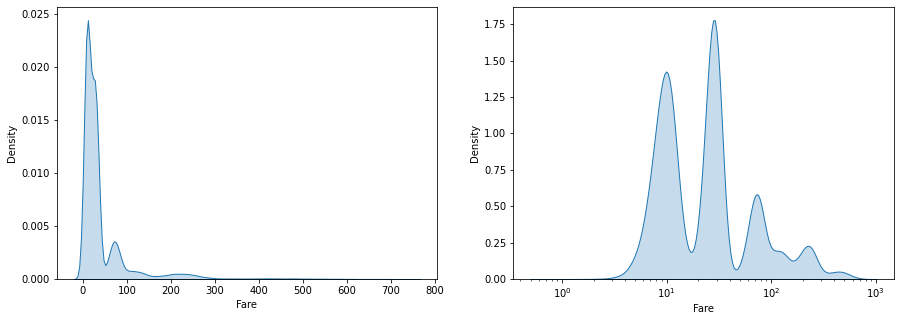

In [262]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.kdeplot(x = f['Fare'], fill = True, ax = ax0)
sns.kdeplot(x = f['Fare'], fill = True, log_scale = True,ax =  ax1)

In [263]:
f_super_wealthy = f[f['Fare']>300]
f_wealthy = f[(f['Fare']<=300 )& (f['Fare']>150)]
f_usual = f[(f['Fare']<=150 )& (f['Fare']>40)]
f_econom = f[(f['Fare']<=40 )& (f['Fare']>19)]
f_super_econom = f[f['Fare']<=19]


In [264]:
def wealth_cat(x):
    if x <=19:
        return 'S_Econom'
    elif x <=40:
        return 'Econom'
    elif x <=150:
        return 'Usual'
    elif x <=300:
        return 'Wealthy'
    else:
        return 'S_Wealthy'


In [265]:
f['Class'] = f['Fare'].apply(wealth_cat)

In [266]:
f.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Class
2,0,3,"Owens, Kenneth",male,0.33,1,2,71.29,NaN,S,Usual
3,0,3,"Kramer, James",male,19.00,0,0,13.04,NaN,S,S_Econom
4,1,3,"Bond, Michael",male,25.00,0,0,7.76,NaN,S,S_Econom
5,0,2,"Sassano, Jonathan",male,35.00,0,0,6.71,NaN,S,S_Econom
6,0,3,"Conway, Jose",male,7.00,0,0,9.77,NaN,S,S_Econom


<AxesSubplot:xlabel='Fare', ylabel='Density'>

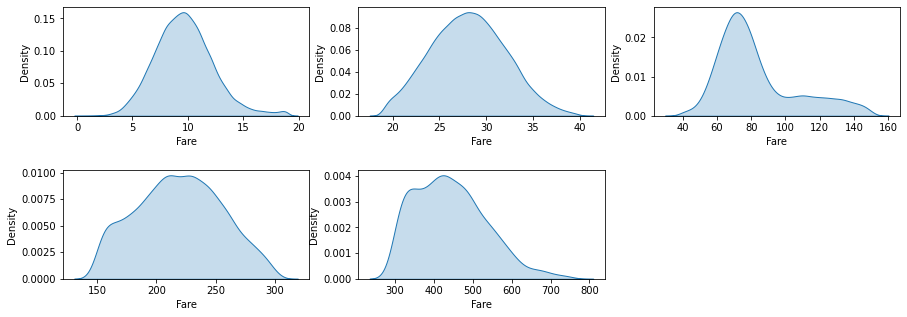

In [267]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(2, 3, hspace = 0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

sns.kdeplot(x = f_super_econom['Fare'], fill = True, ax = ax0)
sns.kdeplot(x = f_econom['Fare'], fill = True, ax = ax1)
sns.kdeplot(x = f_usual['Fare'], fill = True, ax =  ax2)
sns.kdeplot(x = f_wealthy['Fare'], fill = True, ax = ax3)
sns.kdeplot(x = f_super_wealthy['Fare'], fill = True,ax =  ax4)

# Summary statistics

In [268]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95784 entries, 2 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  95784 non-null  int64  
 1   Pclass    95784 non-null  int64  
 2   Name      95784 non-null  object 
 3   Sex       95784 non-null  object 
 4   Age       95784 non-null  float64
 5   SibSp     95784 non-null  int64  
 6   Parch     95784 non-null  int64  
 7   Fare      95784 non-null  float64
 8   Cabin     30799 non-null  object 
 9   Embarked  95784 non-null  object 
 10  Class     95784 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.8+ MB


In [269]:
f[['Age', 'Fare']].describe()

,Age,Fare
count,95784.000000,95784.000000
mean,38.374685,43.908516
std,18.299522,69.549440
min,0.080000,0.680000
25%,25.000000,10.020000
50%,39.000000,24.440000
75%,53.000000,33.510000
max,87.000000,744.660000


<AxesSubplot:xlabel='Parch', ylabel='Count'>

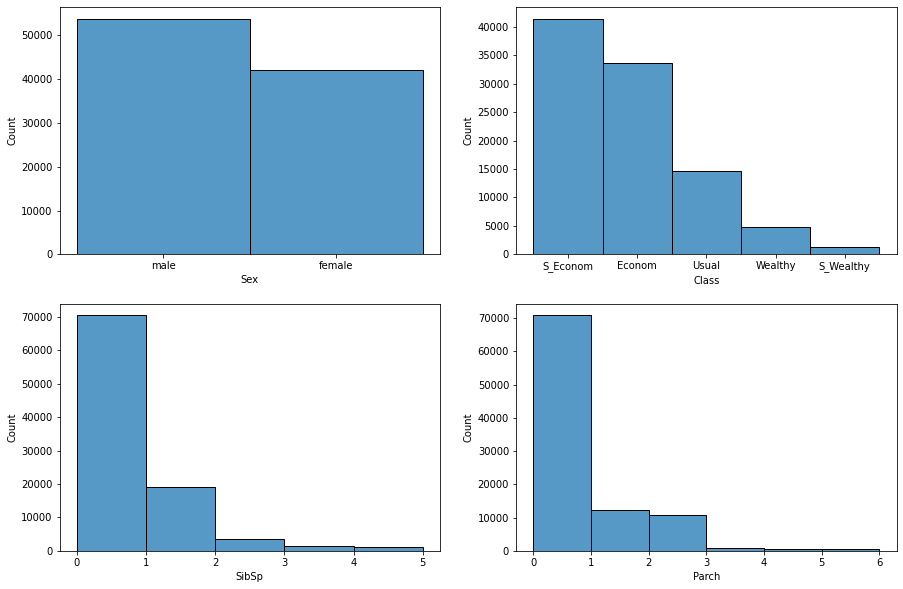

In [270]:
f['Class'] = pd.Categorical(f['Class'], ['S_Econom','Econom','Usual','Wealthy', 'S_Wealthy'])

fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
 
sns.histplot(x = f['Sex'], ax=ax0)
sns.histplot(x = f['Class'], ax=ax1)
sns.histplot(x = f['SibSp'], ax=ax2, binwidth=1)
sns.histplot(x = f['Parch'], ax=ax3, binwidth=1)


# How is the Data connected

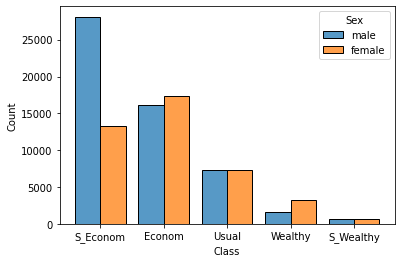

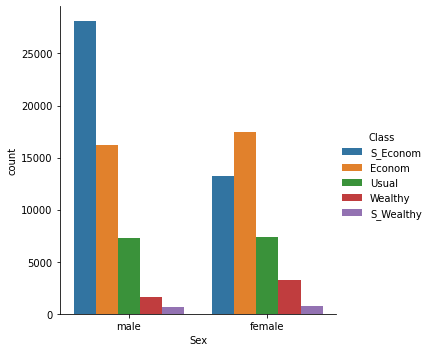

In [271]:
sns.histplot(x = f['Class'], hue = f['Sex'],  multiple="dodge", shrink=.8)
sns.catplot( x="Sex", hue="Class", kind="count", data=f)


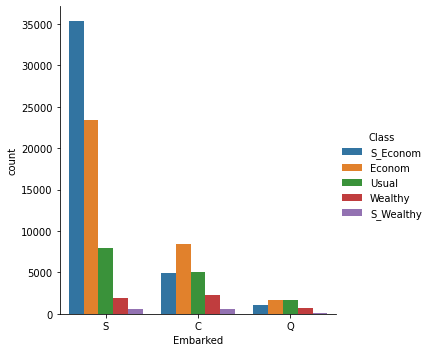

In [272]:
sns.catplot( x="Embarked", hue="Class", kind="count", data=f)

In [273]:
def age(x):
    if x <=18:
        return '18 and under'
    elif x <=40:
        return '18 - 40'
    elif x <=65:
        return '40 - 65'
    else:
        return '65+'


f['Age_group'] = f['Age'].apply(age)
f['Age_group'] = pd.Categorical(f['Age_group'], ['18 and under','18 - 40','40 - 65','65+'])

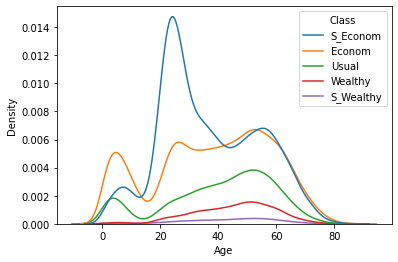

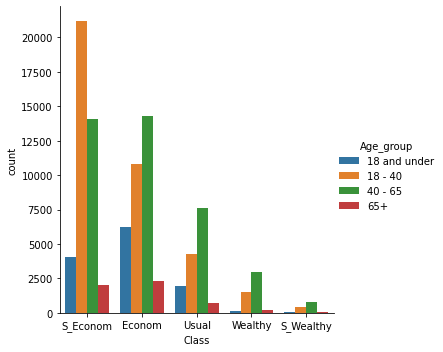

In [274]:
sns.kdeplot( x="Age", hue="Class",  data=f)
sns.catplot( hue="Age_group", x="Class", kind="count", data=f)

In [275]:
def not_alone(x):
    if x>0:
        return 'Not_alone'
    

def wife(x):
    if x>0:
        return 'with spose'
def kids_parents(x):
    if x>0:
        return 'with kids or parents'

f['Not_Alone'] = f['SibSp'].apply(not_alone)
f['Not_Alone'] = f['Parch'].apply(not_alone)

f['Spouse'] = f['SibSp'].apply(wife)
f['kids_parents'] = f['Parch'].apply(kids_parents)


f['Total_family'] = f['SibSp'] + f['Parch']

In [276]:
f.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Class,Age_group,Not_Alone,Spouse,kids_parents,Total_family
2,0,3,"Owens, Kenneth",male,0.33,1,2,71.29,NaN,S,Usual,18 and under,Not_alone,with spose,with kids or parents,3
3,0,3,"Kramer, James",male,19.00,0,0,13.04,NaN,S,S_Econom,18 - 40,None,None,None,0
4,1,3,"Bond, Michael",male,25.00,0,0,7.76,NaN,S,S_Econom,18 - 40,None,None,None,0
5,0,2,"Sassano, Jonathan",male,35.00,0,0,6.71,NaN,S,S_Econom,18 - 40,None,None,None,0
6,0,3,"Conway, Jose",male,7.00,0,0,9.77,NaN,S,S_Econom,18 and under,None,None,None,0


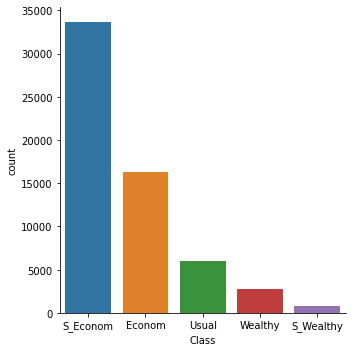

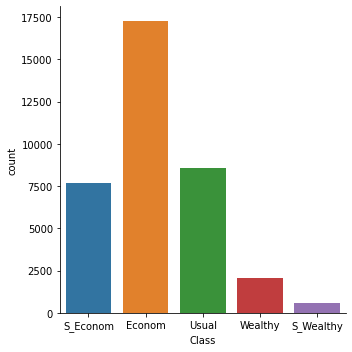

In [284]:
data_class  = f.drop(f[f['Total_family']==0].index)
data_alone = f[f['Total_family']==0]



sns.catplot( kind="count", data=data_alone, x='Class')
sns.catplot(x="Class", kind="count", data=data_class)




<AxesSubplot:xlabel='Class', ylabel='Count'>

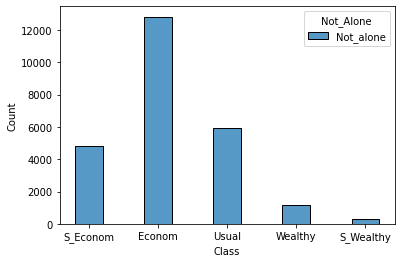

In [285]:
sns.histplot(x = f['Class'], hue = f['Not_Alone'],  multiple="dodge", shrink=.4)